In [29]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

data = pd.read_csv("winequality-red.csv") 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
y = data['quality']
data.drop(data.columns[-1], axis=1, inplace= True)
threshold = (2, 6, 8)
classes = ['bad', 'good']
categories = pd.cut(y, threshold, labels = classes)
y = categories
print(y.value_counts())
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
data.head()

bad     1382
good     217
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1279, 1279, 320, 320)

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# using radial basis kernel function to train using kernel svm
support_vector_classifier = SVC(kernel = 'rbf', random_state = 0)
support_vector_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
# Test prediction on test set
y_pred = support_vector_classifier.predict(X_test)
print("accuracy", metrics.accuracy_score(y_test, y_pred) * 100)
print("precision", metrics.precision_score(y_test, y_pred) * 100)
print("recall", metrics.recall_score(y_test, y_pred) * 100)

accuracy 88.125
precision 100.0
recall 2.564102564102564


In [35]:
kf = KFold(n_splits=5,shuffle=False)
splits = kf.split(data)
accuracy_model = []
precision_model = []
recall_model = []
# Iterate over each train-test split
gamma = [0.1, 1, 10, 100, 1000]
for i in gamma:
    support_vector_classifier = SVC(kernel = 'rbf', random_state = 0, gamma = i)
    for train_index, test_index in splits:
        # Split train-test
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        support_vector_classifier.fit(X_train, y_train)
        # predict the model
        y_pred = support_vector_classifier.predict(X_test)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(metrics.accuracy_score(y_test, y_pred))
        precision_model.append(metrics.precision_score(y_test, y_pred))
        recall_model.append(metrics.recall_score(y_test, y_pred))
    # Print the accuracy    
    print("gamma", i)
    print("accuracy", accuracy_model)
    print("precision", accuracy_model)
    print("recall", accuracy_model)

gamma 0.1
accuracy [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
precision [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
recall [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
gamma 1
accuracy [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
precision [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
recall [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
gamma 10
accuracy [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
precision [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
recall [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
gamma 100
accuracy [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
precision [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
recall [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
gamma 1000
accuracy [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
precision [0.921875, 0.834375, 0.86875, 0.79375, 0.9184952978056427]
rec

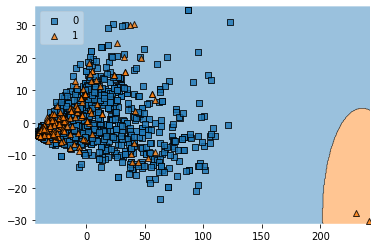

In [39]:
numpy_data = pd.DataFrame(X_train).to_numpy()
numpy_y = pd.DataFrame(y_train).to_numpy()
numpy_y = numpy_y.reshape(numpy_y.shape[0],)
support_vector_classifier = SVC(kernel = 'rbf', random_state = 0)
pca = PCA(n_components = 2)
numpy_data = pca.fit_transform(numpy_data)
support_vector_classifier.fit(numpy_data, numpy_y)
plot_decision_regions(numpy_data, numpy_y, clf=support_vector_classifier, legend=2)
plt.show()

In [37]:
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train,y_train)
y_pred = decision_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8589341692789969


In [38]:
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9216300940438872


C:\Users\MAQS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
